In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
notebook_dir = os.getcwd()


In [63]:
csv_path = os.path.join(notebook_dir, '..', 'data', 'raw_data.csv')
csv_path = os.path.abspath(csv_path)
raw_data_df = pd.read_csv(csv_path)
raw_data_df.info()
raw_data_df[:10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071475 entries, 0 to 8071474
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   raw_ts         float64
 1   raw_amplitude  float64
dtypes: float64(2)
memory usage: 123.2 MB


,raw_ts,raw_amplitude
0,2000.000049,1.522938
1,2000.000149,1.458149
2,2000.000249,1.004952
3,2000.000349,-0.116204
4,2000.000449,-0.809816
5,2000.000549,-0.682868
6,2000.000649,-0.449690
7,2000.000749,-0.259925
8,2000.000849,0.224188
9,2000.000949,0.443881


In [64]:
csv_path = os.path.join(notebook_dir, '..', 'data', 'spike_timestamps.csv')
csv_path = os.path.abspath(csv_path)
action_potentials_df = pd.read_csv(csv_path)
action_potentials_df.info()
action_potentials_df[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   spike_idx  536 non-null    int64  
 1   spike_ts   536 non-null    float64
 2   track      536 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 12.7+ KB


,spike_idx,spike_ts,track
0,0,2000.062149,Track3
1,1,2000.073049,Track4
2,2,2004.062249,Track3
3,3,2004.073149,Track4
4,4,2008.062349,Track3
5,5,2008.073049,Track4
6,6,2012.062349,Track3
7,7,2012.073149,Track4
8,8,2016.059667,Track3
9,9,2016.070467,Track4


In [65]:
csv_path = os.path.join(notebook_dir, '..', 'data', 'stimulation_timestamps.csv')
csv_path = os.path.abspath(csv_path)
stimuli_df = pd.read_csv(csv_path)
stimuli_df.info()
stimuli_df[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stimulation_idx  267 non-null    int64  
 1   stimulation_ts   267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


,stimulation_idx,stimulation_ts
0,0,2003.838249
1,1,2007.838249
2,2,2011.838249
3,3,2015.835667
4,4,2016.085667
5,5,2016.335667
6,6,2016.585667
7,7,2019.835550
8,8,2023.835550
9,9,2027.835550


In [66]:
##############################################
##############################################
# FAKE FILE SIMULATION
##############################################
##############################################
def generate_fake_spike_data_from_ground_truth(action_potentials_df, file_name="fake_spikes.csv"):    
    spike_idx = action_potentials_df['spike_idx'].values
    spike_ts = action_potentials_df['spike_ts'].values
    
    num_spikes = len(spike_idx)
    tracks = [f"Track{i}" for i in range(1, 6)]
    track = [tracks[i % len(tracks)] for i in range(num_spikes)]
    df = pd.DataFrame({
        "spike_idx": spike_idx,
        "spike_ts": spike_ts,
        "track": track
    })

    df.to_csv(file_name, index=False)
    return df

fake_spikes = generate_fake_spike_data_from_ground_truth(action_potentials_df, file_name="fake_spikes.csv")
print(fake_spikes)

     spike_idx     spike_ts   track
0            0  2000.062149  Track1
1            1  2000.073049  Track2
2            2  2004.062249  Track3
3            3  2004.073149  Track4
4            4  2008.062349  Track5
..         ...          ...     ...
531        531  2800.079703  Track2
532        532  2804.069703  Track3
533        533  2804.079903  Track4
534        534  2808.069603  Track5
535        535  2808.079603  Track1

[536 rows x 3 columns]


In [75]:
def plot_raw_data(start_index, end_index, raw_data_df, action_potentials_df, stimuli_df, ax=None):
    raw_data_df_subset = raw_data_df.iloc[start_index:end_index]
    min_ts = raw_data_df_subset['raw_ts'].iloc[0]
    max_ts = raw_data_df_subset['raw_ts'].iloc[-1]

    stimulus_timestamps_in_range = stimuli_df[(stimuli_df['stimulation_ts'] >= min_ts) & (stimuli_df['stimulation_ts'] <= max_ts)]
    action_potential_timestamps_in_range = action_potentials_df[(action_potentials_df['spike_ts'] >= min_ts) & (action_potentials_df['spike_ts'] <= max_ts)]


    if ax is None:
        fig, ax = plt.subplots(figsize=(25, 6))
    else:
        fig = None

    # Line plot for raw data
    ax.plot(raw_data_df_subset['raw_ts'], raw_data_df_subset['raw_amplitude'], color='gray', linewidth=1.5, label='Raw Data')

    # Mark stimulus timestamps with vertical lines and markers
    ax.vlines(stimulus_timestamps_in_range['stimulation_ts'],
              ymin=raw_data_df_subset['raw_amplitude'].min(),
              ymax=raw_data_df_subset['raw_amplitude'].max(),
              color='orange', linestyle='--', linewidth=1)
    ax.scatter(stimulus_timestamps_in_range['stimulation_ts'],
               [raw_data_df_subset['raw_amplitude'].max()] * len(stimulus_timestamps_in_range),
               color='orange', marker='o', s=150)
    ax.scatter(stimulus_timestamps_in_range['stimulation_ts'],
               [raw_data_df_subset['raw_amplitude'].min()] * len(stimulus_timestamps_in_range),
               color='orange', marker='o', s=250, label='Stimulus')

    # unique tracks
    unique_tracks_list = list(action_potentials_df['track'].unique())
    num_tracks = len(unique_tracks_list)
    track_colors = sns.color_palette("viridis", num_tracks)
    marker_styles = ['s', '^', 'D', 'p', '*', '+', 'x', '|', '_', 'v', '<', '>', 'P', 'X', 'h', 'H']

    for i, track in enumerate(unique_tracks_list):
        df_track = action_potential_timestamps_in_range[action_potential_timestamps_in_range['track'] == track]
        track_color = track_colors[i]
        marker = marker_styles[i % len(marker_styles)]

        # Mark AP timestamps with vertical lines and markers
        ax.vlines(df_track['spike_ts'],
                  ymin=raw_data_df_subset['raw_amplitude'].min(),
                  ymax=raw_data_df_subset['raw_amplitude'].max(),
                  color=track_color, linestyle='--', linewidth=1)
        ax.scatter(df_track['spike_ts'], [raw_data_df_subset['raw_amplitude'].max()] * len(df_track),
                   color=track_color, marker=marker, s=150)
        ax.scatter(df_track['spike_ts'], [raw_data_df_subset['raw_amplitude'].min()] * len(df_track),
                   color=track_color, marker=marker, s=250, label=f'{track}')

    # Formatting
    ax.set_xlim(min_ts, max_ts)
    ax.set_xlabel('Timestamp', fontsize=16)
    ax.set_ylabel('Amplitude', fontsize=16)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=20))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.3f}'))
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              ncol=len(ax.get_legend_handles_labels()[0]),
              frameon=False, fancybox=True, fontsize=18)

    ax.grid(axis='y', linestyle=':', linewidth=0.8)

    if fig:
        fig.tight_layout(rect=[0, 0, 1, 0.85])
    return ax

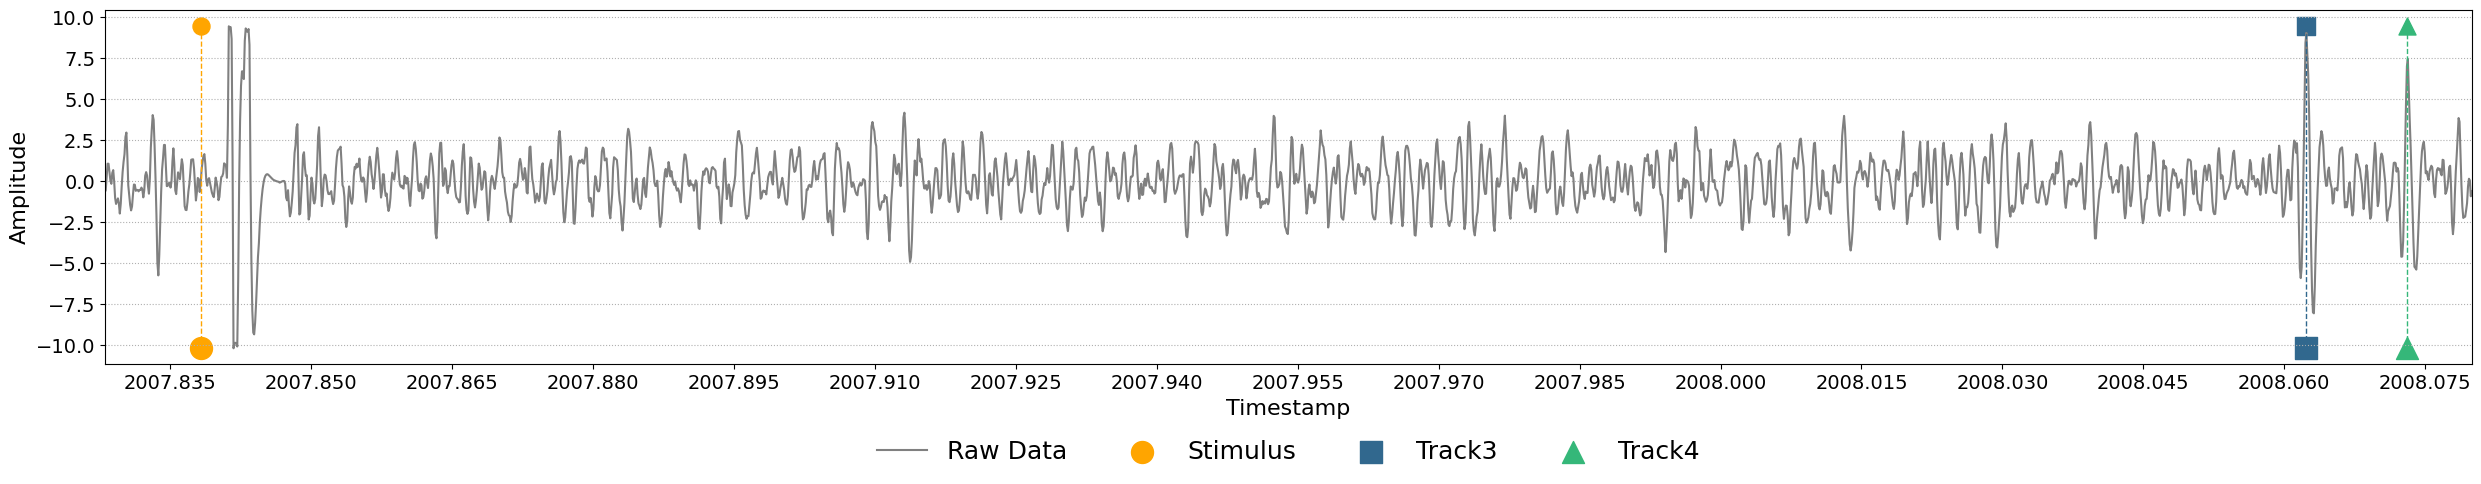

In [76]:
fig = plot_raw_data(78280, 80800, raw_data_df, action_potentials_df, stimuli_df)

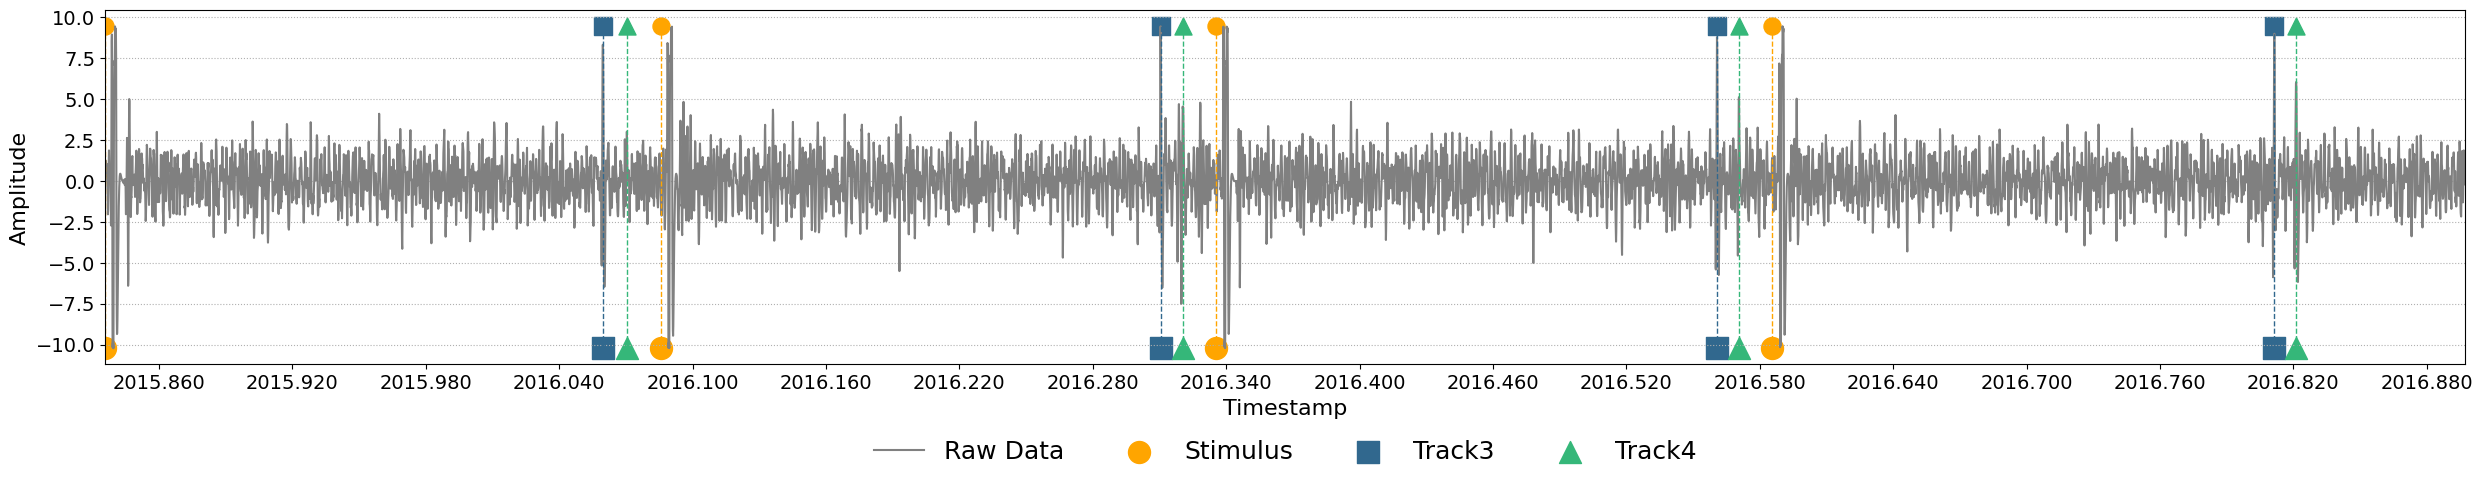

In [77]:
fig = plot_raw_data(157382, 168000, raw_data_df, action_potentials_df, stimuli_df)

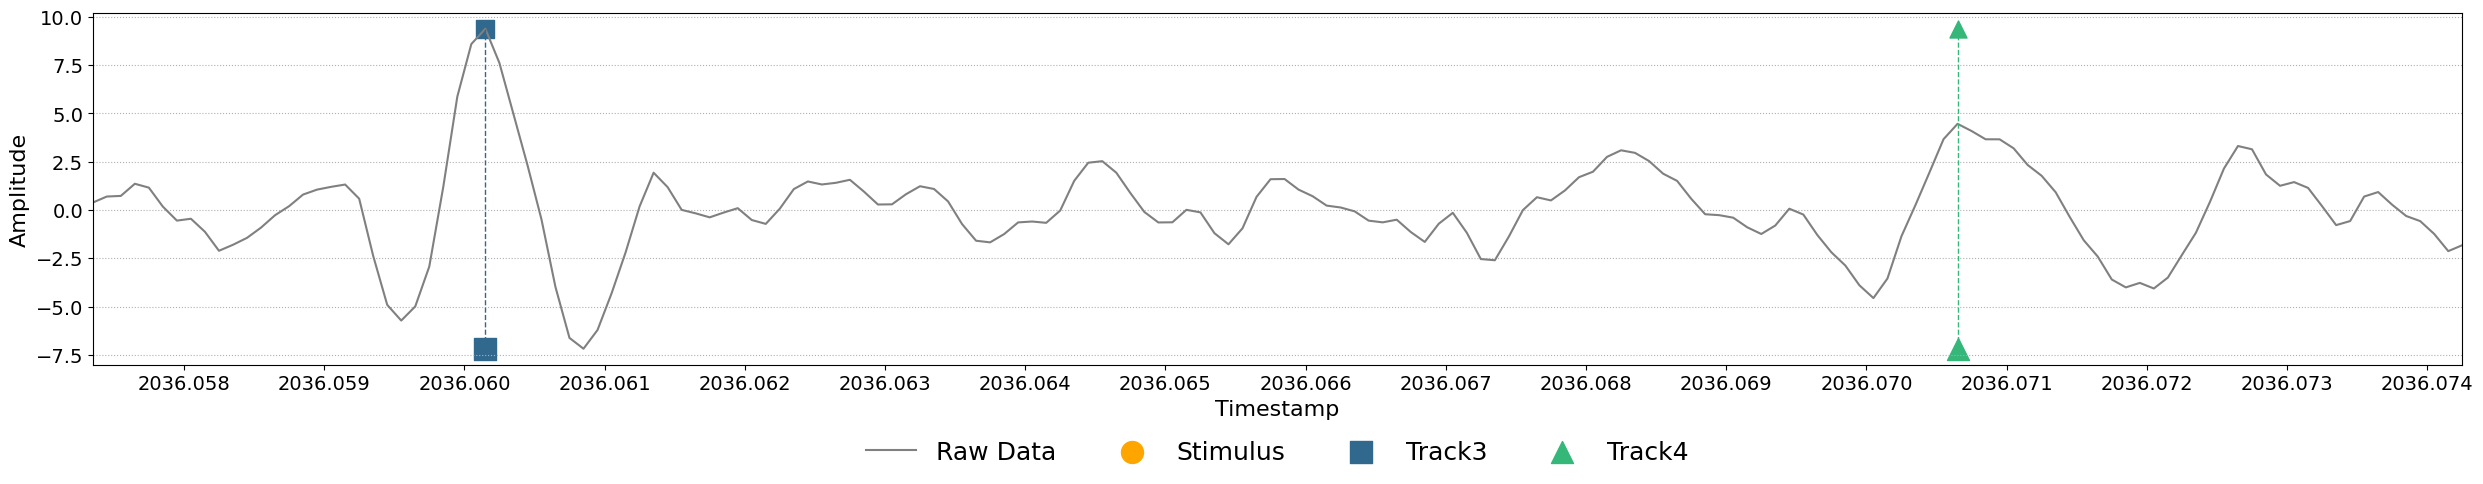

In [78]:
fig = plot_raw_data(358600, 358770, raw_data_df, action_potentials_df, stimuli_df)

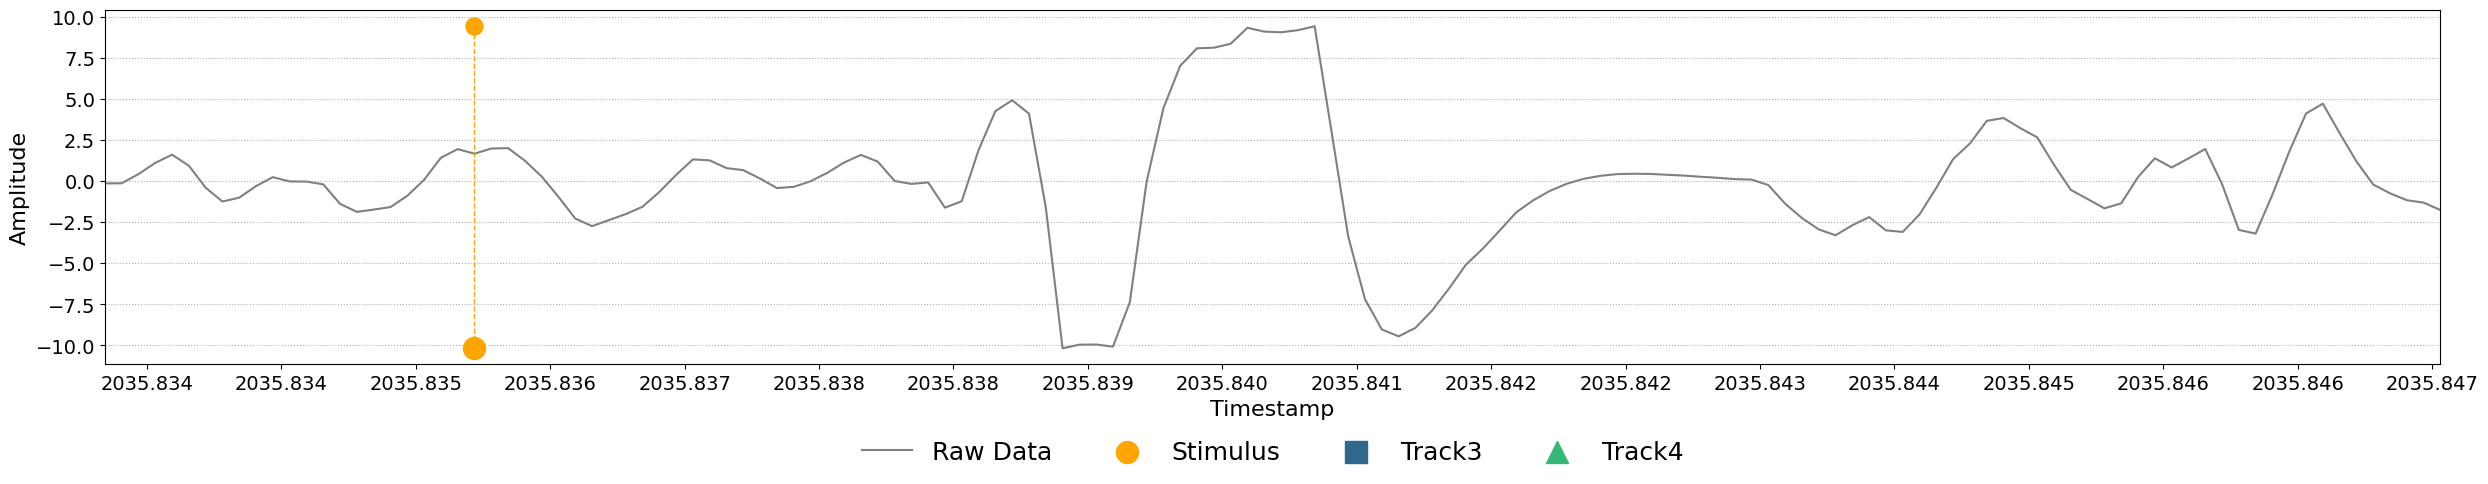

In [79]:
fig = plot_raw_data(356360, 356500, raw_data_df, action_potentials_df, stimuli_df)

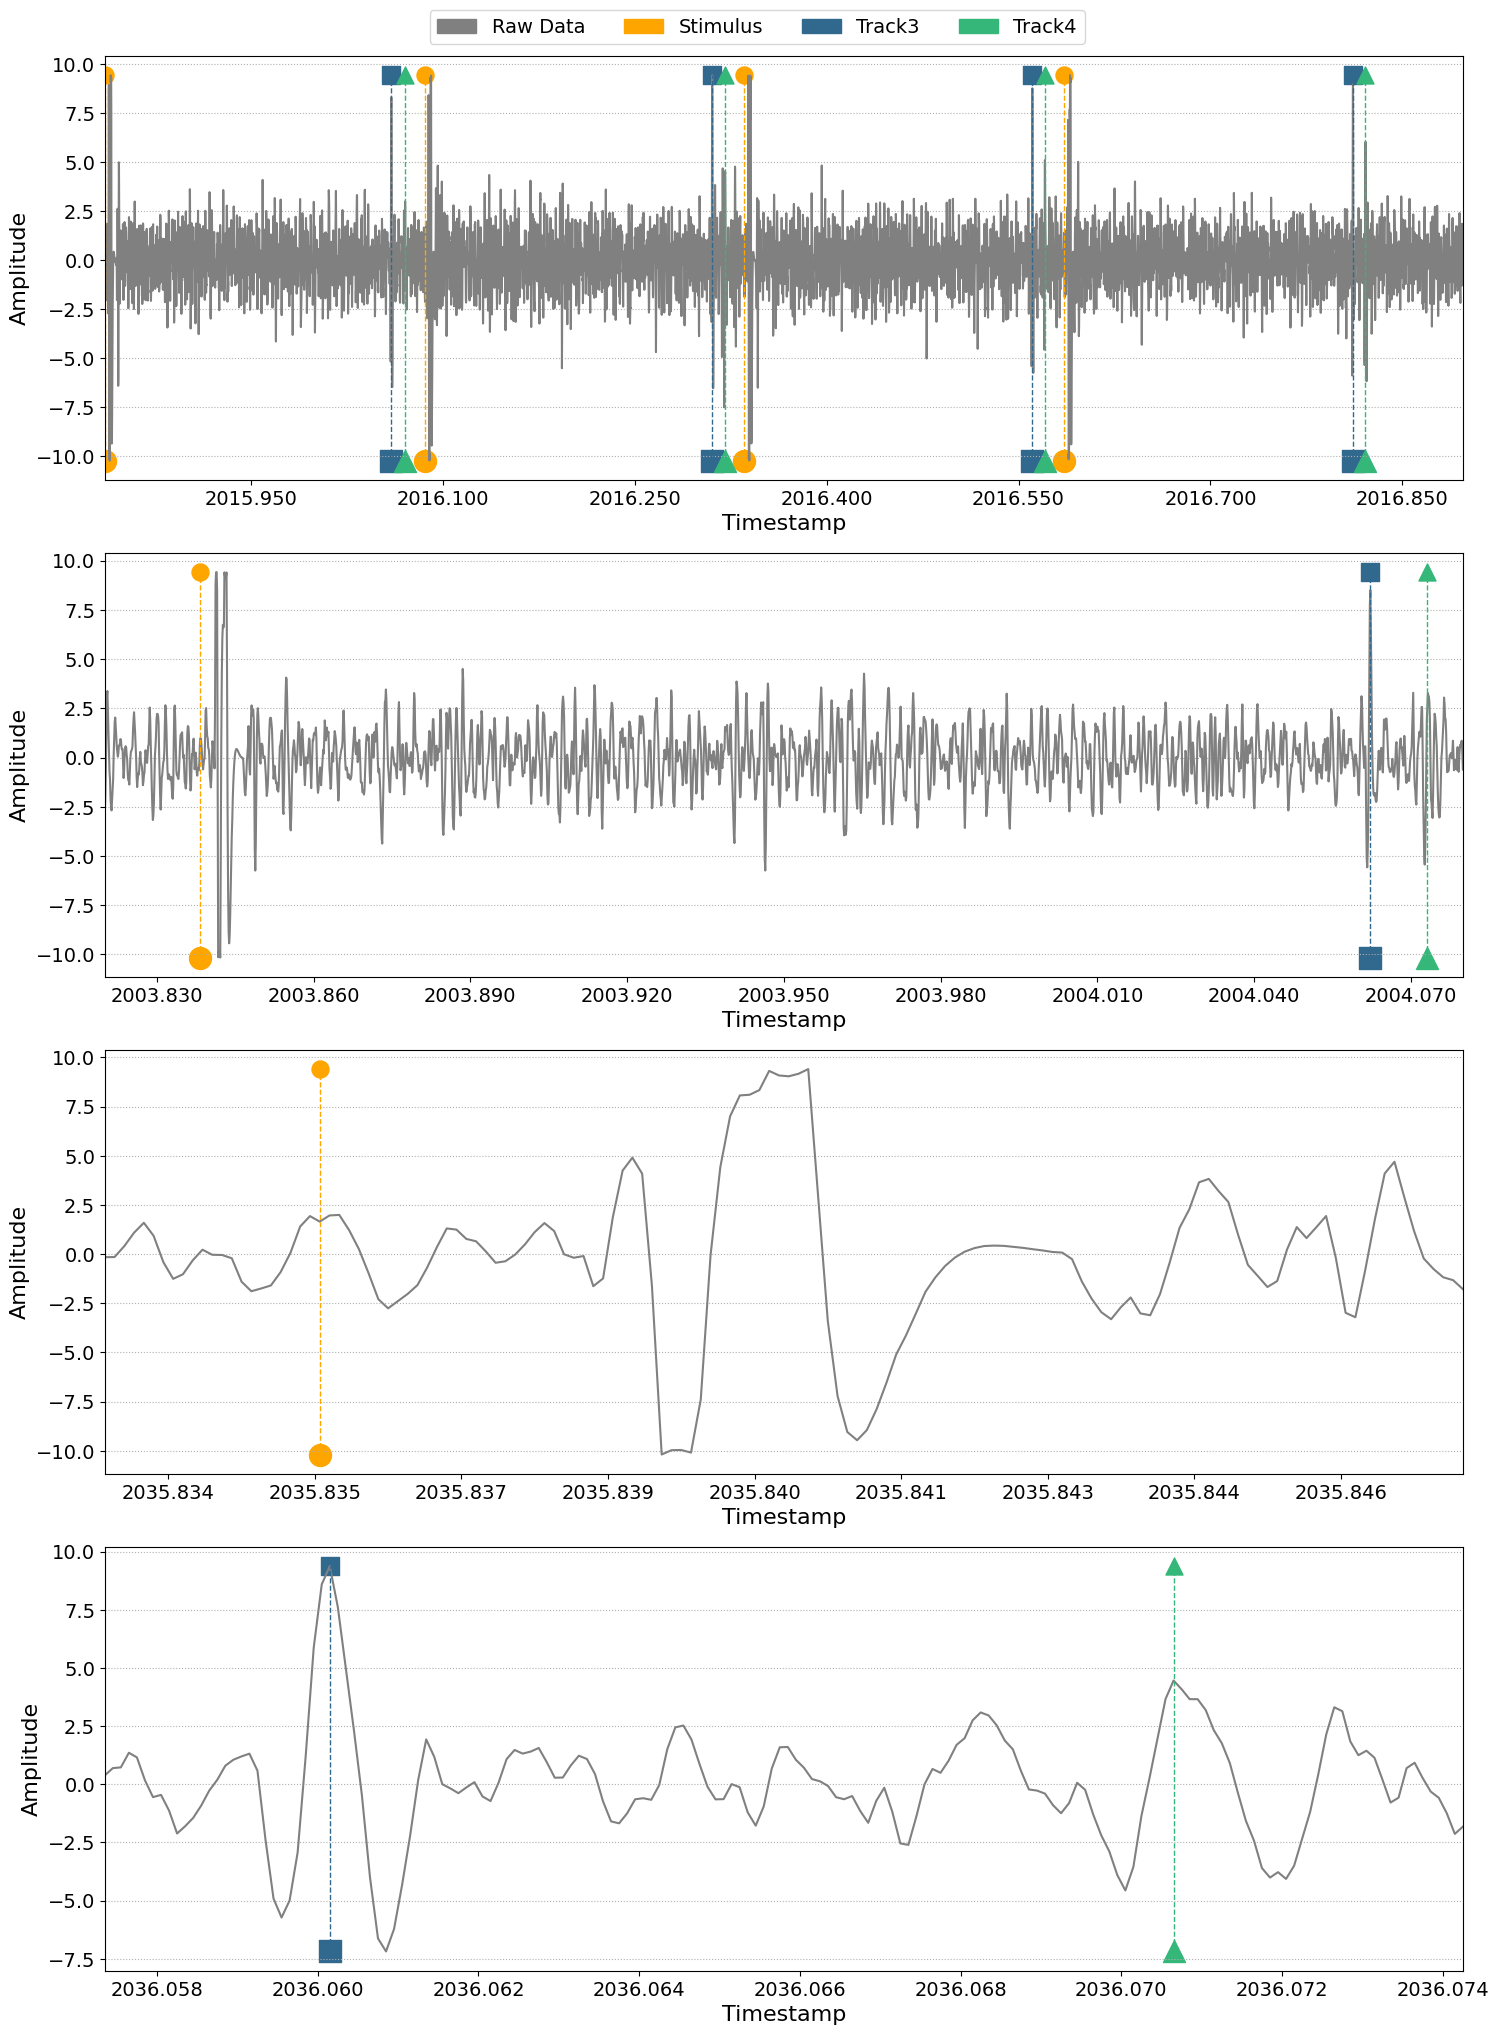

In [80]:
def plot_raw_data_multiple_ranges(raw_data_df, stimuli_df, action_potentials_df, ranges_to_plot):
    num_subplots = len(ranges_to_plot)
    fig, axes = plt.subplots(num_subplots, 1, figsize=(15, 5 * num_subplots))

    unique_tracks_list = list(action_potentials_df['track'].unique())
    track_colors = sns.color_palette("viridis", len(unique_tracks_list))

    legend_elements = [
        mpatches.Patch(color='gray', label='Raw Data'),
        mpatches.Patch(color='orange', label='Stimulus'),
    ]
    for j, track in enumerate(unique_tracks_list):
        legend_elements.append(mpatches.Patch(color=track_colors[j], label=track))

    for subplot_idx, (range_start, range_end) in enumerate(ranges_to_plot):
        ax = axes[subplot_idx] if num_subplots > 1 else axes

        base_plot_ax = plot_raw_data(range_start, range_end, raw_data_df, action_potentials_df, stimuli_df, ax=ax)
        base_plot_ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=10))
        base_plot_ax.get_legend().remove()

    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize=14)
    plt.tight_layout()
    plt.show()


ranges_to_plot = [
    (157382, 168000),
    (38200, 40800),
    (356360, 356500),
    (358600, 358770)
]

plot_raw_data_multiple_ranges(raw_data_df, stimuli_df, action_potentials_df, ranges_to_plot)


In [81]:
stimulus_in_raw_data_indices = np.asarray(raw_data_df.index[raw_data_df['raw_ts'].isin(stimuli_df['stimulation_ts'])])
stimulus_distances = np.asarray(stimulus_in_raw_data_indices)
print(np.diff(stimulus_distances))

[ 40000  40000  39000   2500   2500   2500  31500  40000  40000  40000
  40000  40000  40000  40000  40000 119000   2500   2500   2500  32000
 359000   2500   2500   2500  31500 799000   2500   2500   2500   2500
   2500  26500 599000   2500   2500   2500   2500   2500  27000 639000
   2500   2500   2500   2500   2500  26500 559500   2500   2500   2500
   2500   2500   2500   2500  22000 679000   2500   2500   2500   2500
   2500   2500   2500  21500 559500   2500   2500   2500   2500   2500
   2500   2500   2500   2500  16500 519500   2500   2500   2500   2500
   2500   2500   2500   2500   2500  16500 559000   2500   2500   2500
   2500   2500   2500   2500   2500   2500  17000]


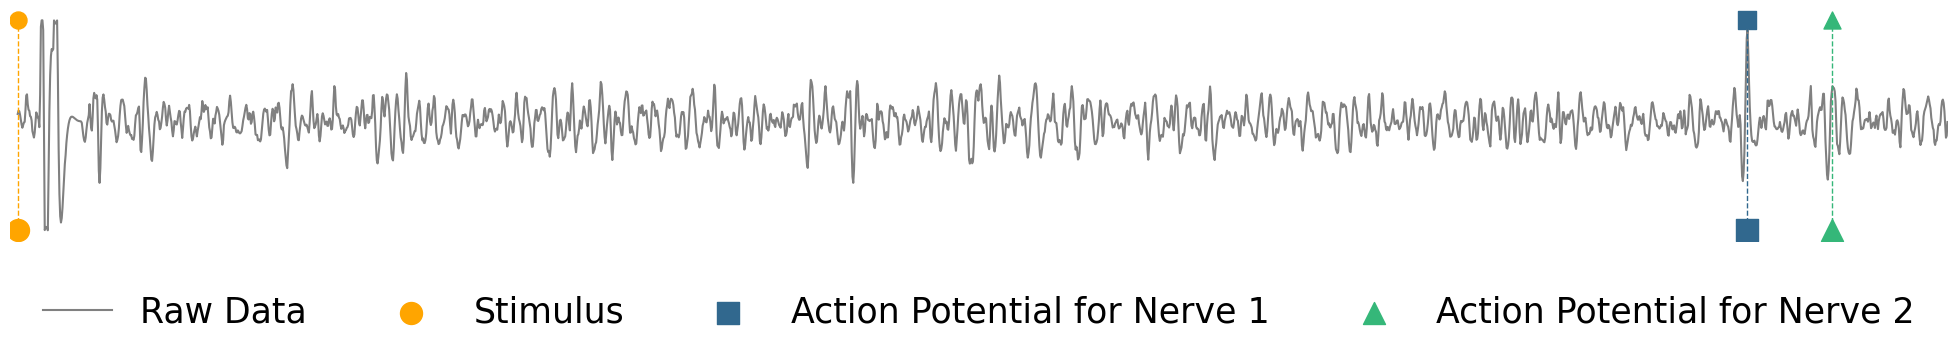

In [82]:
for enum_idx, stimulus_idx in enumerate(stimulus_in_raw_data_indices):
    if(enum_idx > 0 and stimulus_idx - stimulus_in_raw_data_indices[enum_idx-1] == 2500):
        print("Repetitive stimulus")
    fig, ax = plt.subplots(figsize=(25, 3))
    base_plot_ax = plot_raw_data(stimulus_idx, stimulus_idx+2500, raw_data_df, action_potentials_df, stimuli_df, ax=ax)
    base_plot_ax.set_xticks([])
    base_plot_ax.set_yticks([])

    for side in ['top', 'right', 'left', 'bottom']:
        base_plot_ax.spines[side].set_visible(False)

    xlim = base_plot_ax.get_xlim()
    base_plot_ax.set_xlim(xlim[0] - 0.001, xlim[1])

    base_plot_ax.set_ylabel('')
    base_plot_ax.set_xlabel('')

    #bas_plot_ax.get_legend().remove()

    base_handles, base_labels = base_plot_ax.get_legend_handles_labels()
    custom_labels = ["Raw Data", "Stimulus", "Action Potential for Nerve 1", "Action Potential for Nerve 2"]
    new_handles = base_handles[:len(custom_labels)]
    plt.legend(handles=new_handles, labels=custom_labels,
               loc='upper center', bbox_to_anchor=(0.5, -0.1),
               ncol=len(new_handles), frameon=False, fancybox=True, fontsize=25)
    plt.show()
    break